In [47]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [10]:
eth = pd.read_csv(os.path.join("data", "ethereum_cleaned.csv"))
eth = eth.rename(columns={"Datetime":"date"})
eth['date'] = pd.to_datetime(eth['date'])
eth['date'] = eth['date'].dt.strftime('%Y-%m-%d')
eth.head()

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
0,0,2022-01-05,"['eth', 'http', 'co', 'nolnum7c3k']",0.0,1.000,0.000,0.0000
1,1,2022-01-05,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.0,0.725,0.275,0.5859
2,2,2022-01-05,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.0,1.000,0.000,0.0000
3,3,2022-01-05,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.0,1.000,0.000,0.0000
4,4,2022-01-05,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.0,1.000,0.000,0.0000


In [13]:
eth_neg = eth[eth['negative'] > 0]
eth_pos = eth[eth['positive'] > 0]

In [14]:
eth_pos

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp
1,1,2022-01-05,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.000,0.725,0.275,0.5859
6,6,2022-01-05,"['4', 'hour', 'top', 'mover', 'report', 'block...",0.000,0.913,0.087,0.2023
7,7,2022-01-05,"['degousdt', 'bear', 'alert', '5x', 'volum', '...",0.000,0.896,0.104,0.2960
9,9,2022-01-05,"['everyon', 'good', 'weekend', 'nftcommun', 'n...",0.000,0.707,0.293,0.4404
11,11,2022-01-05,"['look', 'next', 'earli', 'earli', 'discord', ...",0.122,0.766,0.113,-0.0516
...,...,...,...,...,...,...,...
160004,160004,2022-05-15,"['atom', 'short', 'alert', 'exchang', 'ftx', '...",0.000,0.941,0.059,0.2960
160005,160005,2022-05-15,"['uniqu', 'modern', 'win', 'win', 'trade', 'st...",0.000,0.648,0.352,0.8225
160009,160009,2022-05-15,"['bnb', 'long', 'alert', 'exchang', 'ftx', 'ma...",0.000,0.939,0.061,0.2960
160010,160010,2022-05-15,"['btc', 'long', 'alert', 'exchang', 'binanc', ...",0.000,0.919,0.081,0.2960


In [15]:
print(len(eth_neg))
print(len(eth_pos))

44434
59351


In [16]:
positive = eth_pos['cleaned']

from matplotlib import pyplot as plt
from wordcloud import WordCloud 

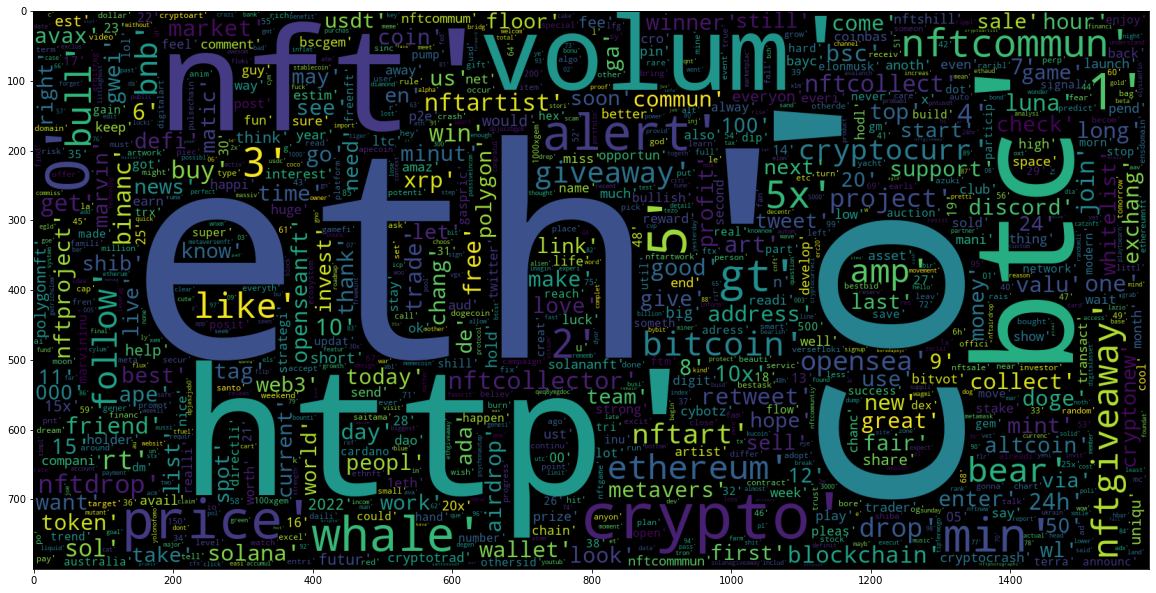

In [18]:
positive = eth_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

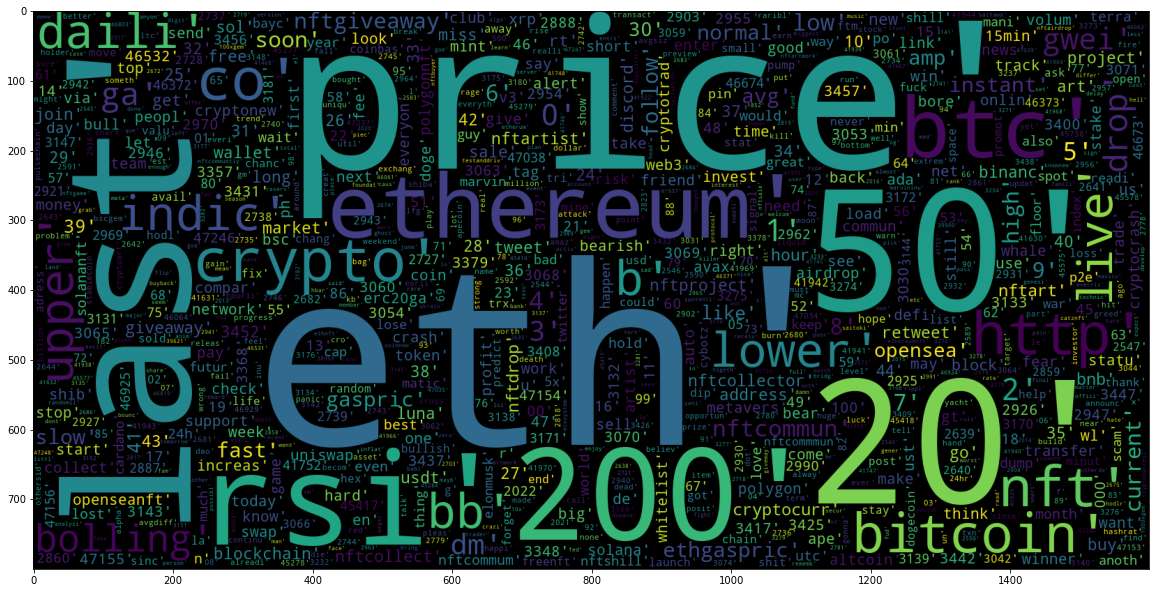

In [19]:
negative = eth_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

In [25]:
eth['Pos/Neg'] = np.where(eth['comp']>0, 1, 0)
eth.head()

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,Pos/Neg
0,0,2022-01-05,"['eth', 'http', 'co', 'nolnum7c3k']",0.0,1.000,0.000,0.0000,0
1,1,2022-01-05,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.0,0.725,0.275,0.5859,1
2,2,2022-01-05,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.0,1.000,0.000,0.0000,0
3,3,2022-01-05,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.0,1.000,0.000,0.0000,0
4,4,2022-01-05,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.0,1.000,0.000,0.0000,0


In [64]:
eth_pos_avg = eth.groupby('date')['positive'].mean()
eth_pos_avg = eth_pos_avg.reset_index()
eth_pos_avg.head()

,date,positive
0,2022-01-05,0.066687
1,2022-02-05,0.071033
2,2022-03-05,0.064314
3,2022-04-05,0.059247
4,2022-05-05,0.064315


In [67]:
eth_neg_avg = eth.groupby('date')['negative'].mean()
eth_neg_avg = eth_neg_avg.reset_index()
eth_neg_avg.head()

,date,negative
0,2022-01-05,0.034621
1,2022-02-05,0.031173
2,2022-03-05,0.029137
3,2022-04-05,0.028192
4,2022-05-05,0.031312


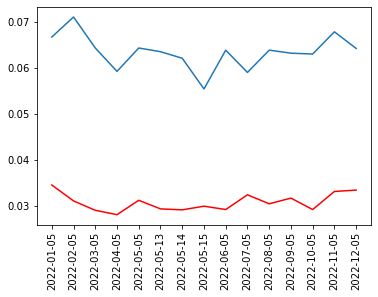

<Figure size 72000x288 with 0 Axes>

In [69]:
plt.plot(eth_pos_avg['date'],eth_pos_avg["positive"], linestyle = 'solid')
plt.plot(eth_neg_avg['date'],eth_neg_avg["negative"], linestyle = 'solid', color = "red")
plt.xticks(rotation = 90)
plt.figure().set_figwidth(1000)
plt.show()

In [32]:
X = eth["cleaned"]
y = eth["Pos/Neg"]

In [45]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [46]:
y_actu = y
y_pred = y_train
confusion_matrix(y_actu, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [160016, 120012]